# seaborn.barplot
---
Bar graphs are useful for displaying relationships between categorical data and at least one numerical variable. `seaborn.countplot` is a barplot where the dependent variable is the number of instances of each instance of the independent variable.

dataset: [IMDB 5000 Movie Dataset](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

In [2]:
df = pd.read_csv('../../../datasets/movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


For the bar plot, let's look at the number of movies in each category, allowing each movie to be counted more than once.


In [4]:
# split each movie's genre list, then form a set from the unwrapped list of all genres
categories = set([s for genre_list in df.genres.unique() for s in genre_list.split("|")])

# one-hot encode each movie's classification
for cat in categories:
    df[cat] = df.genres.transform(lambda s: int(cat in s))
# drop other columns
df = df[['director_name','genres','duration'] + list(categories)]
df.head()


,director_name,genres,duration,Reality-TV,Family,Biography,Comedy,Action,Crime,Sci-Fi,...,Mystery,Film-Noir,Sport,Adventure,Drama,Romance,Western,War,Animation,News
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,178.0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,Gore Verbinski,Action|Adventure|Fantasy,169.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Sam Mendes,Action|Adventure|Thriller,148.0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Christopher Nolan,Action|Thriller,164.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Doug Walker,Documentary,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# convert from wide to long format and remove null classificaitons
df = pd.melt(df,
             id_vars=['duration'],
             value_vars = list(categories),
             var_name = 'Category',
             value_name = 'Count')
df = df.loc[df.Count>0]
top_categories = df.groupby('Category').aggregate(sum).sort_values('Count', ascending=False).index
howmany=10
# add an indicator whether a movie is short or long, split at 100 minutes runtime
df['islong'] = df.duration.transform(lambda x: int(x > 100))
df = df.loc[df.Category.isin(top_categories[:howmany])]
# sort in descending order
#df = df.loc[df.groupby('Category').transform(sum).sort_values('Count', ascending=False).index]

In [6]:
df.head()

,duration,Category,Count,islong
15136,100.0,Comedy,1,0
15148,106.0,Comedy,1,1
15164,104.0,Comedy,1,1
15170,106.0,Comedy,1,1
15172,103.0,Comedy,1,1


Basic plot

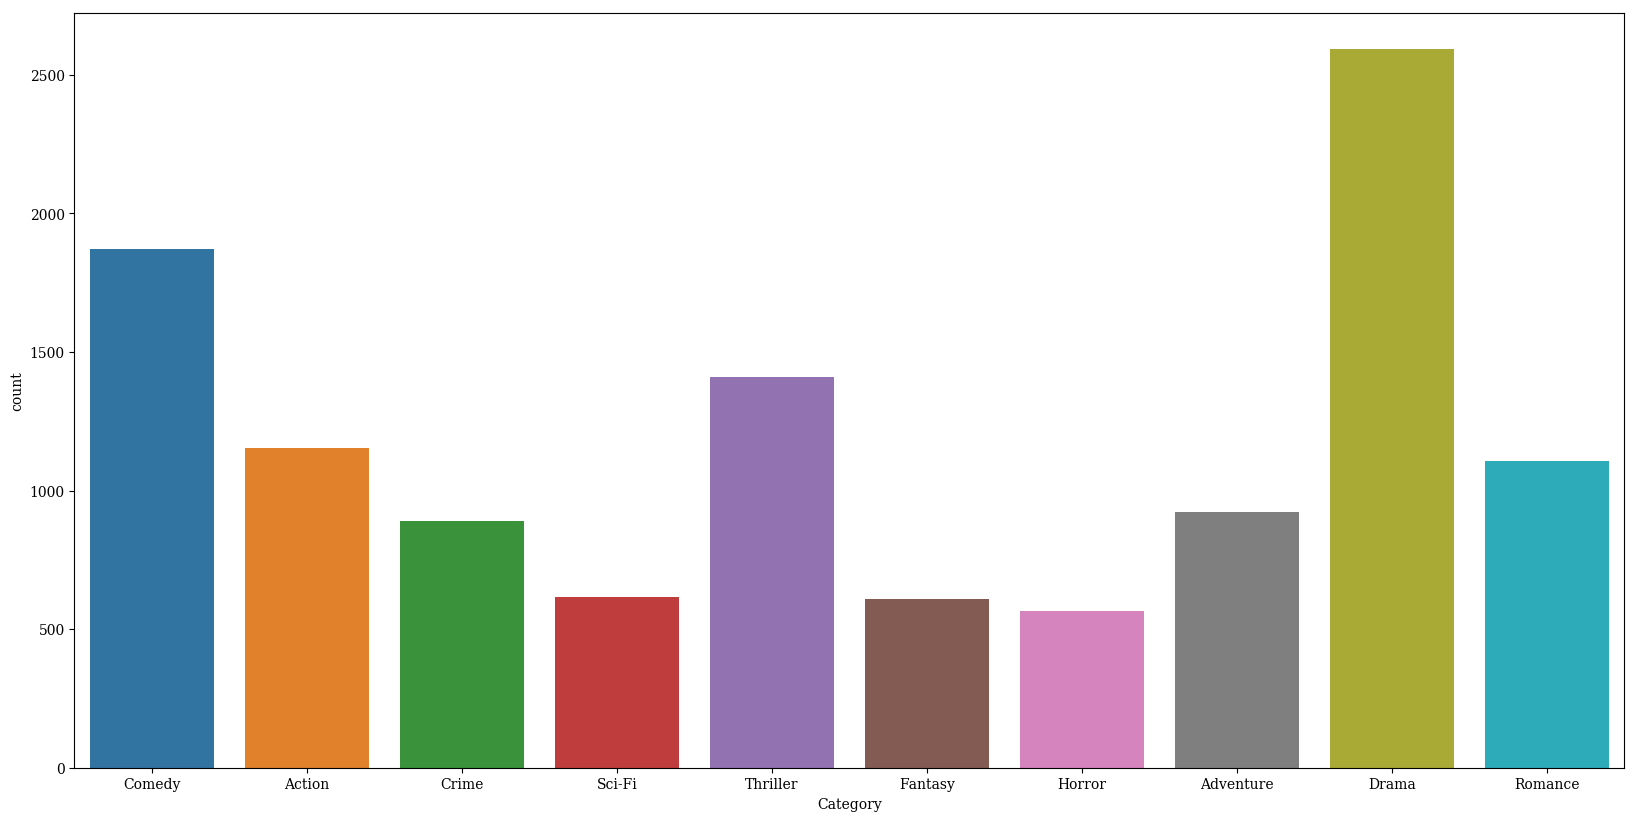

In [7]:
p = sns.countplot(data=df, x = 'Category')

color by a category

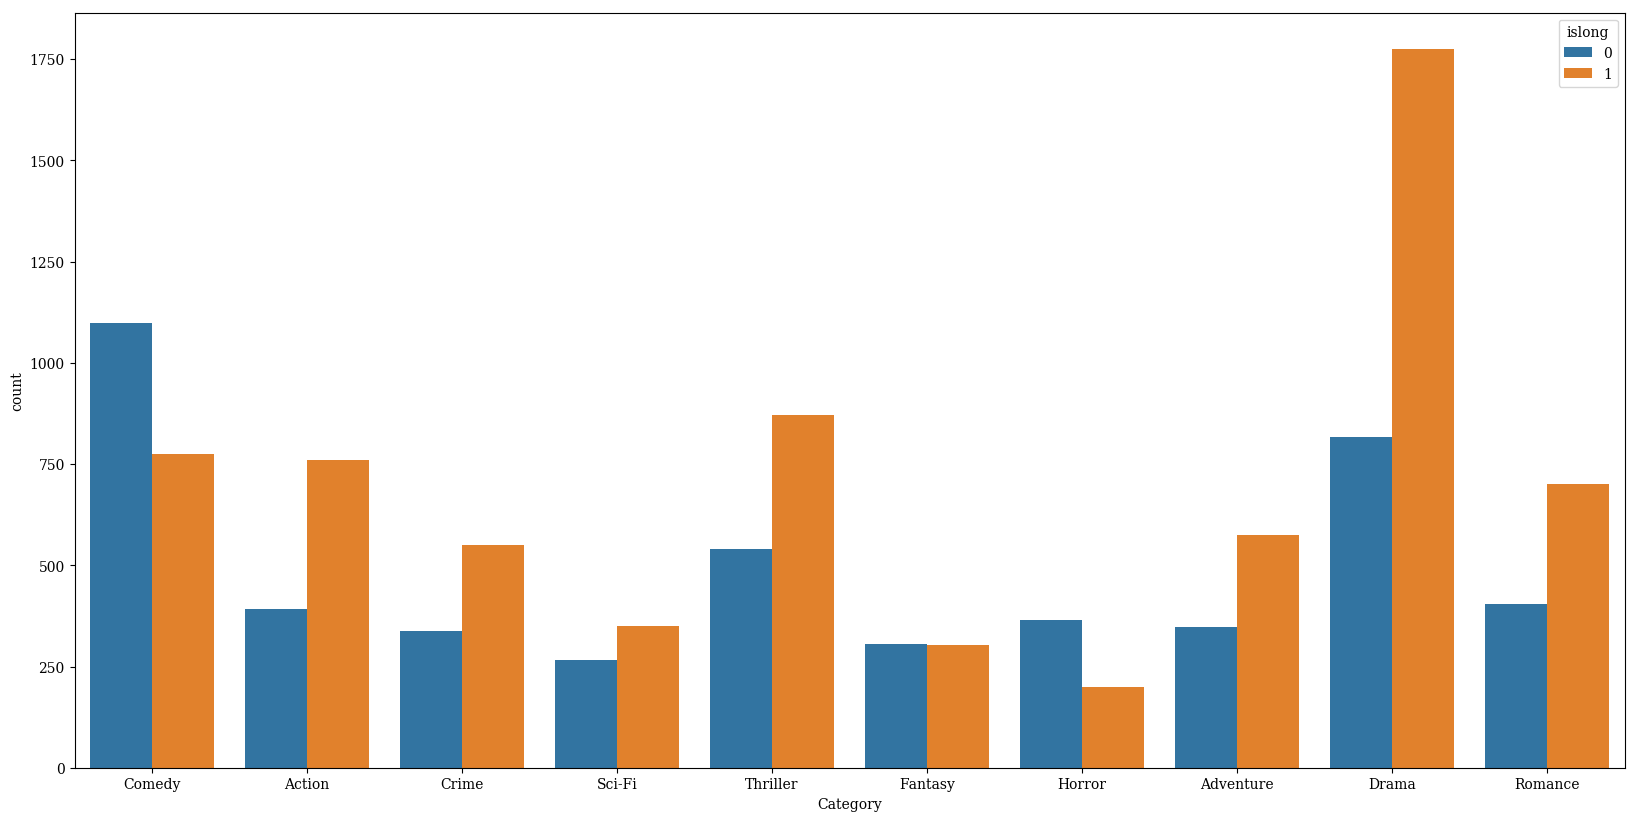

In [8]:
p = sns.countplot(data=df,
                  x = 'Category',
                  hue = 'islong')

make plot horizontal

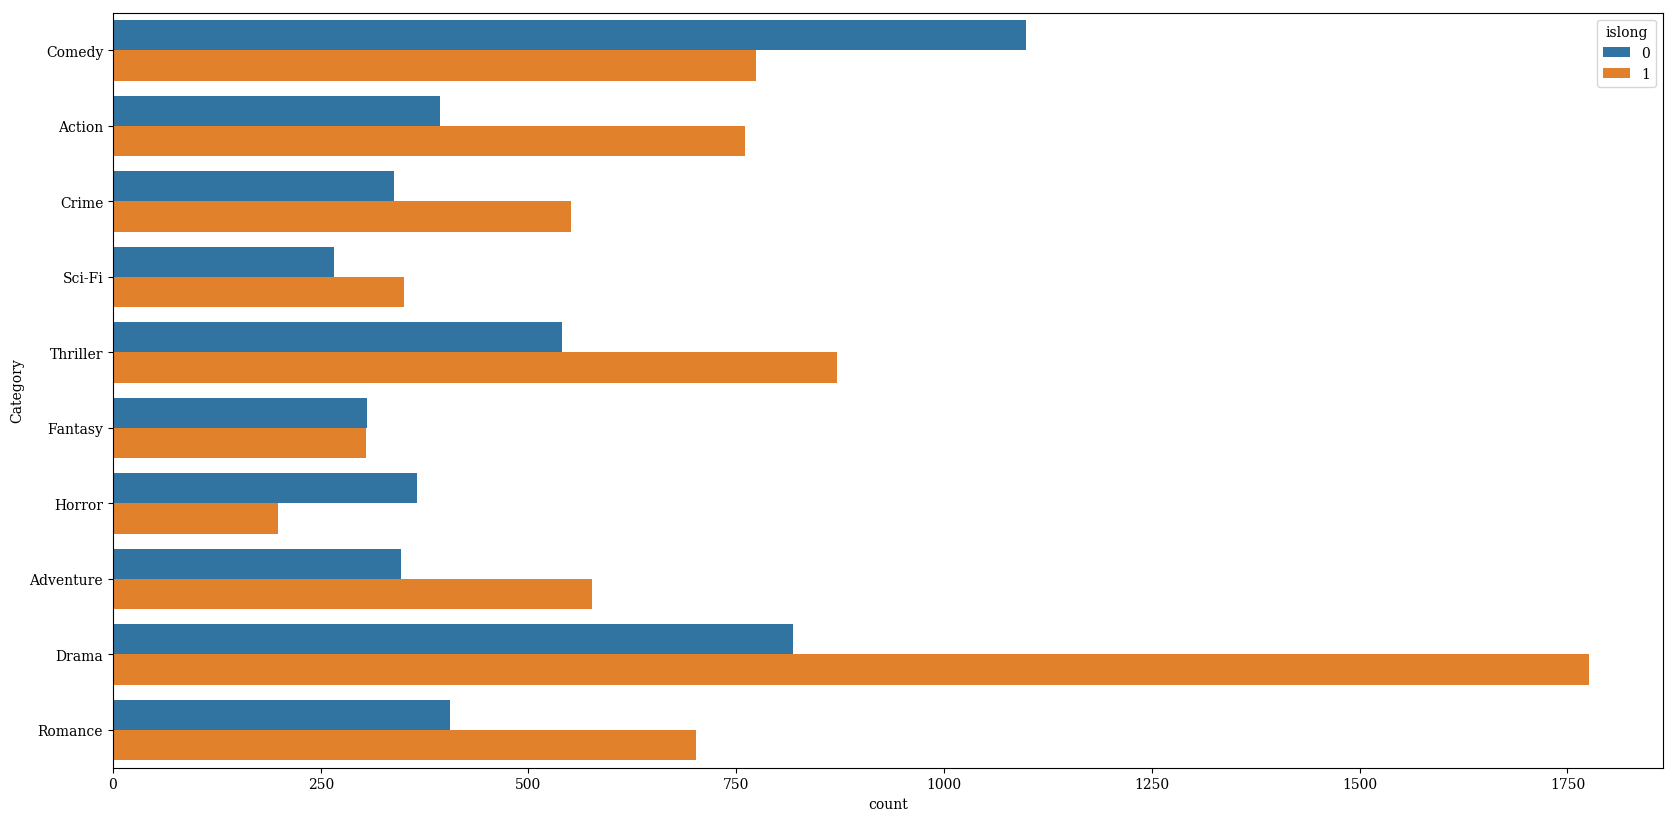

In [9]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong')

Saturation

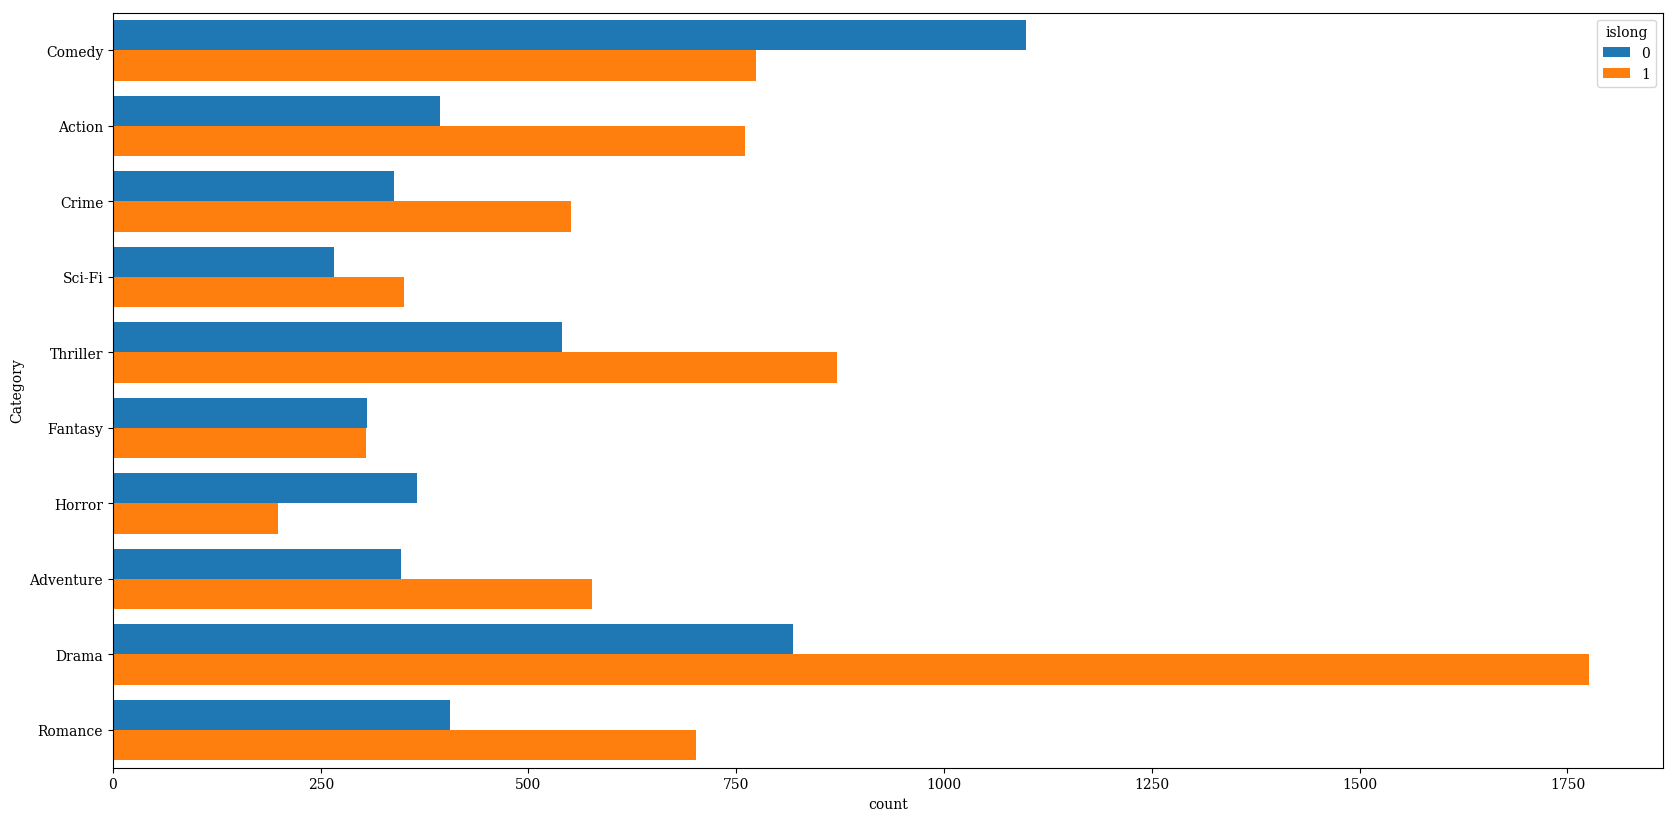

In [10]:
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1)

Targeting a non-default axes

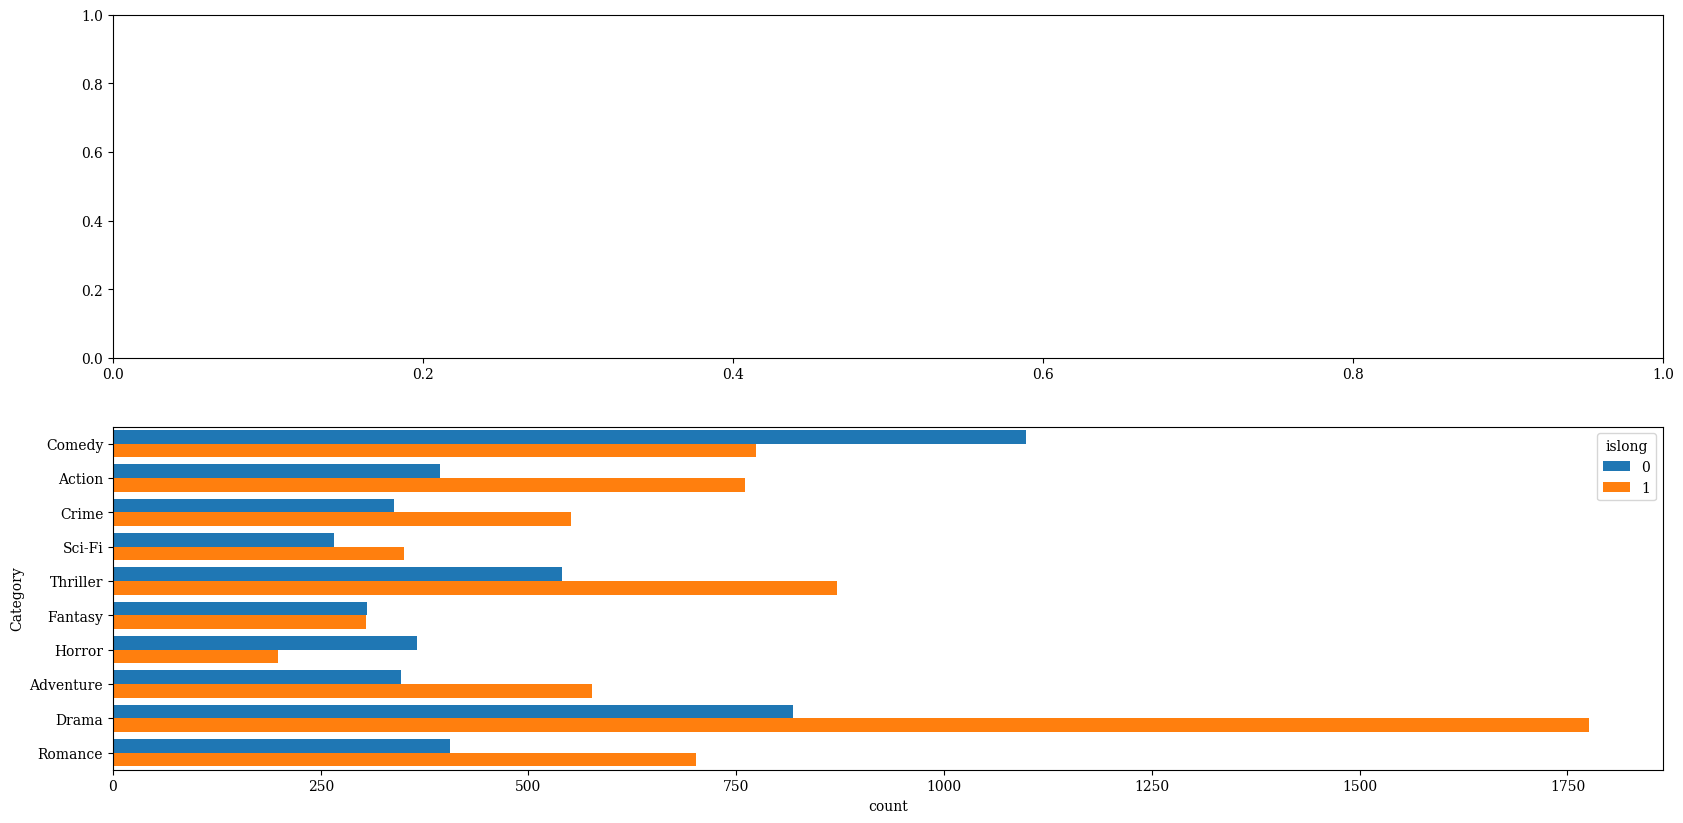

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2)
sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  ax=ax[1])

Add error bars

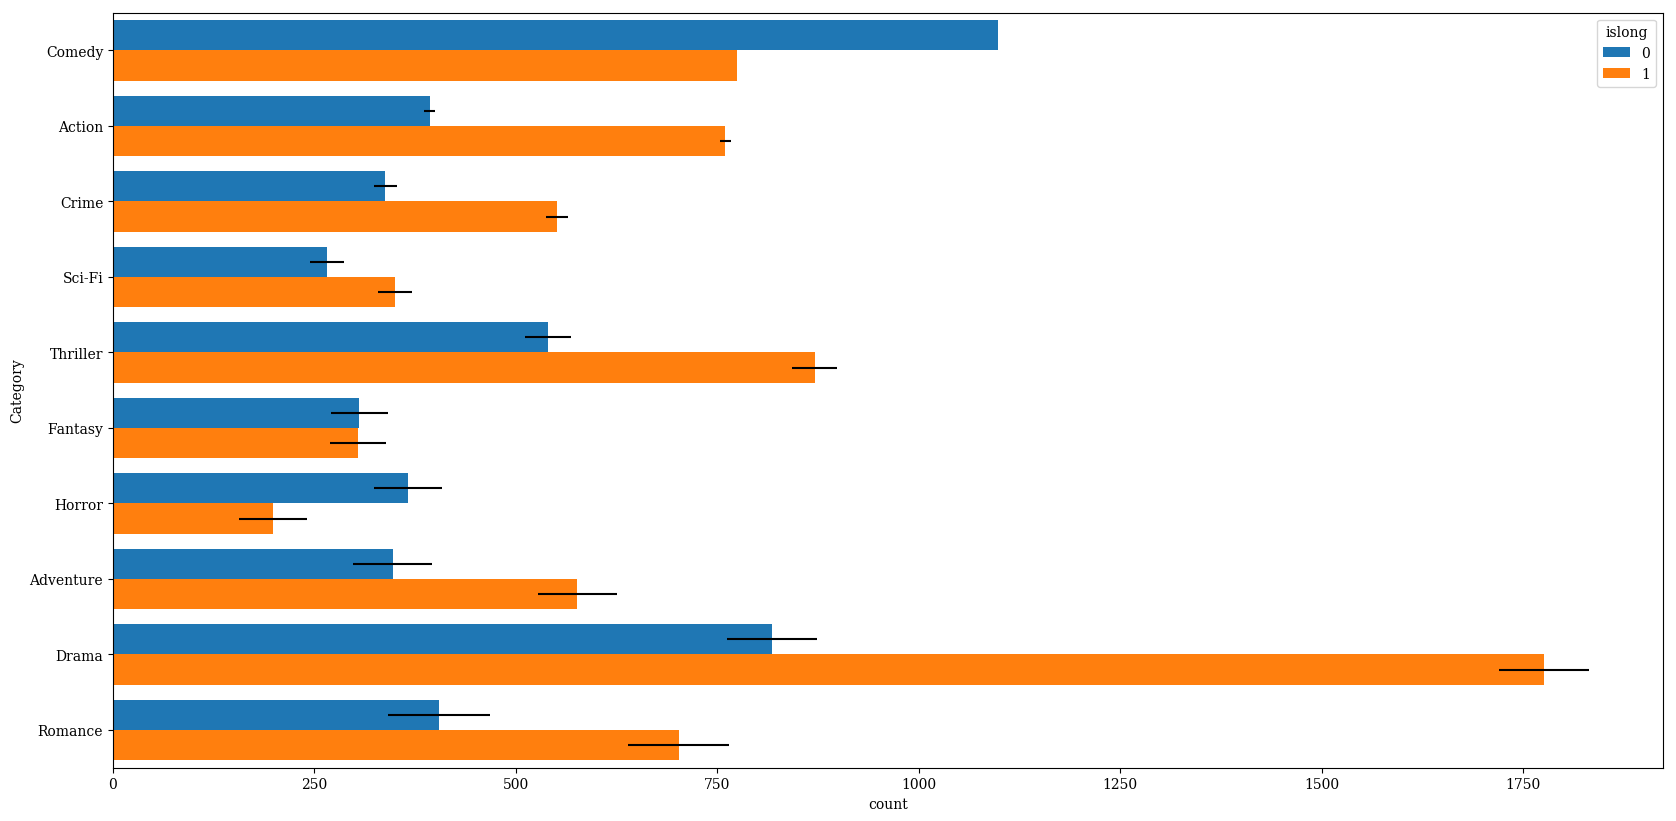

In [12]:
import numpy as np
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=7*np.arange(num_categories))

add black bounding lines

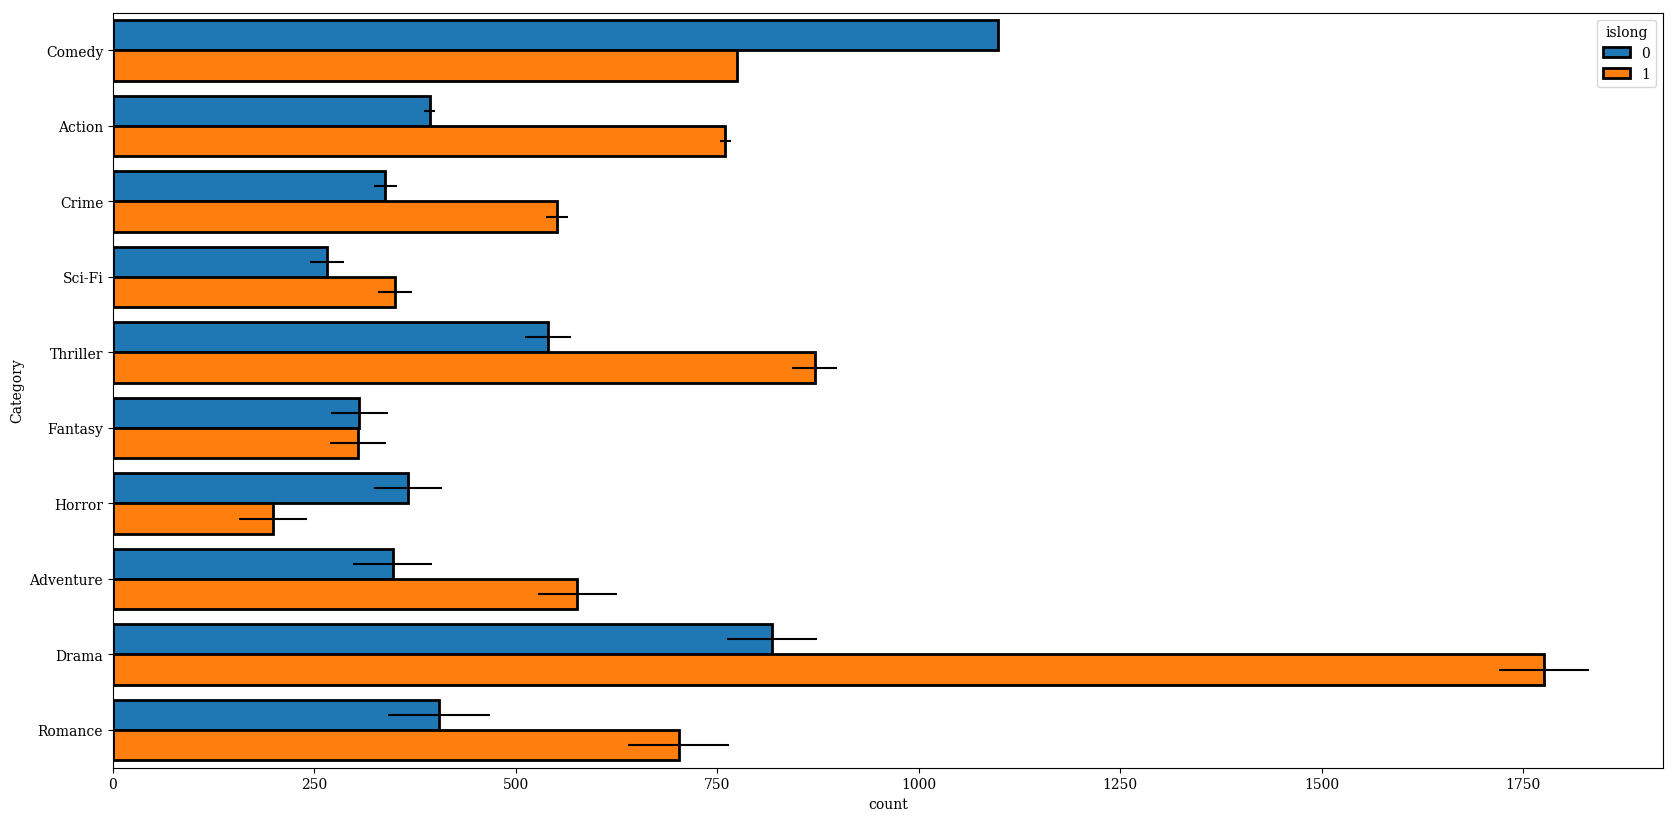

In [13]:
import numpy as np
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=7*np.arange(num_categories),
                  edgecolor=(0,0,0),
                  linewidth=2)

Remove color fill

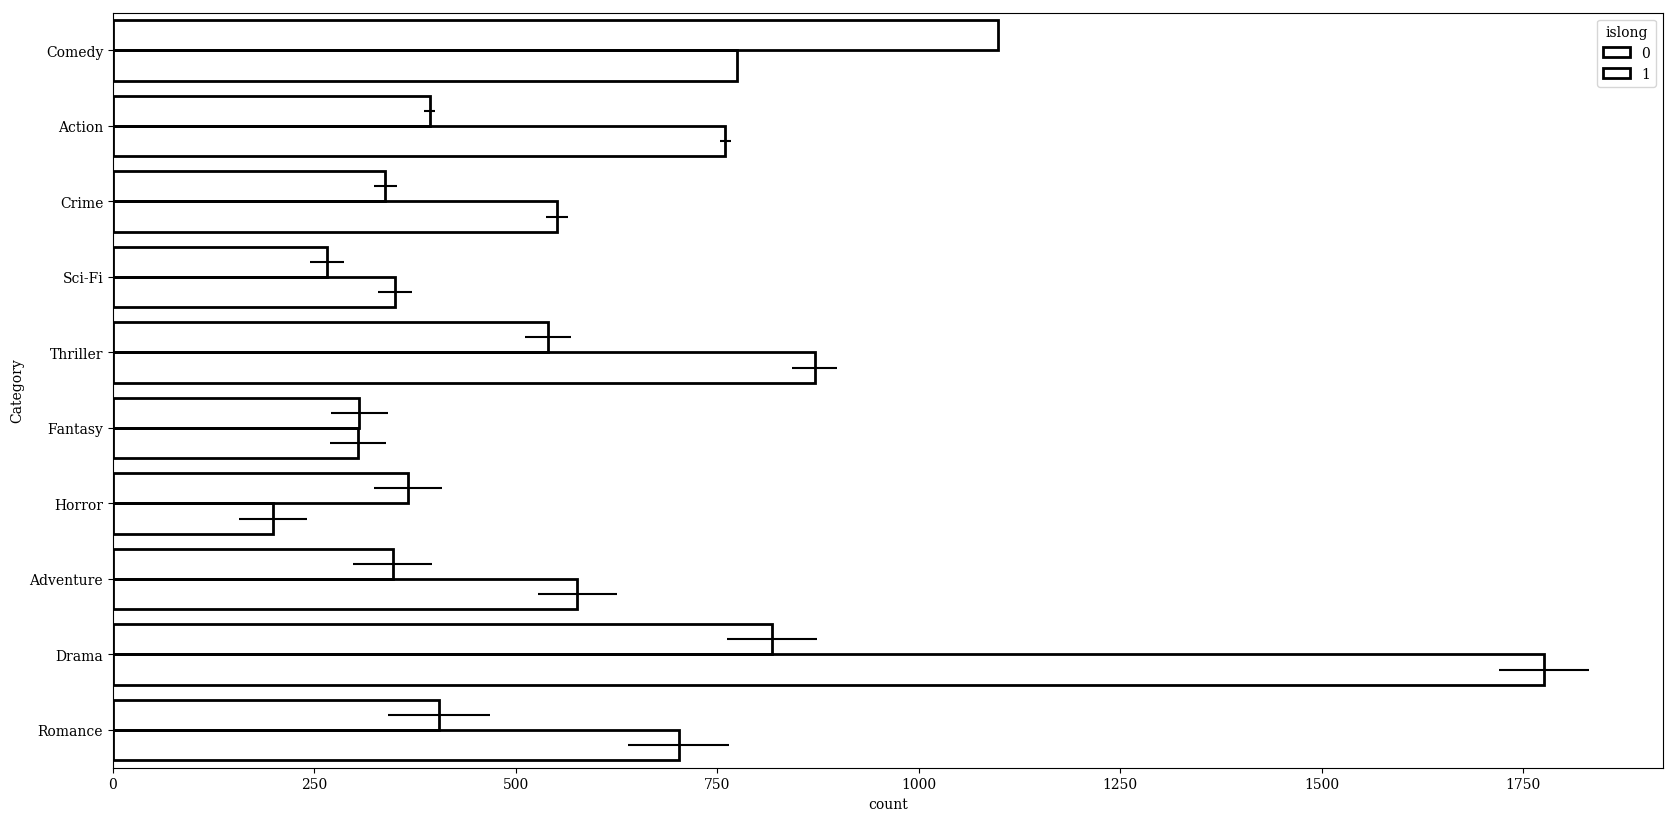

In [14]:
import numpy as np
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=7*np.arange(num_categories),
                  edgecolor=(0,0,0),
                  linewidth=2,
                  fill=False)

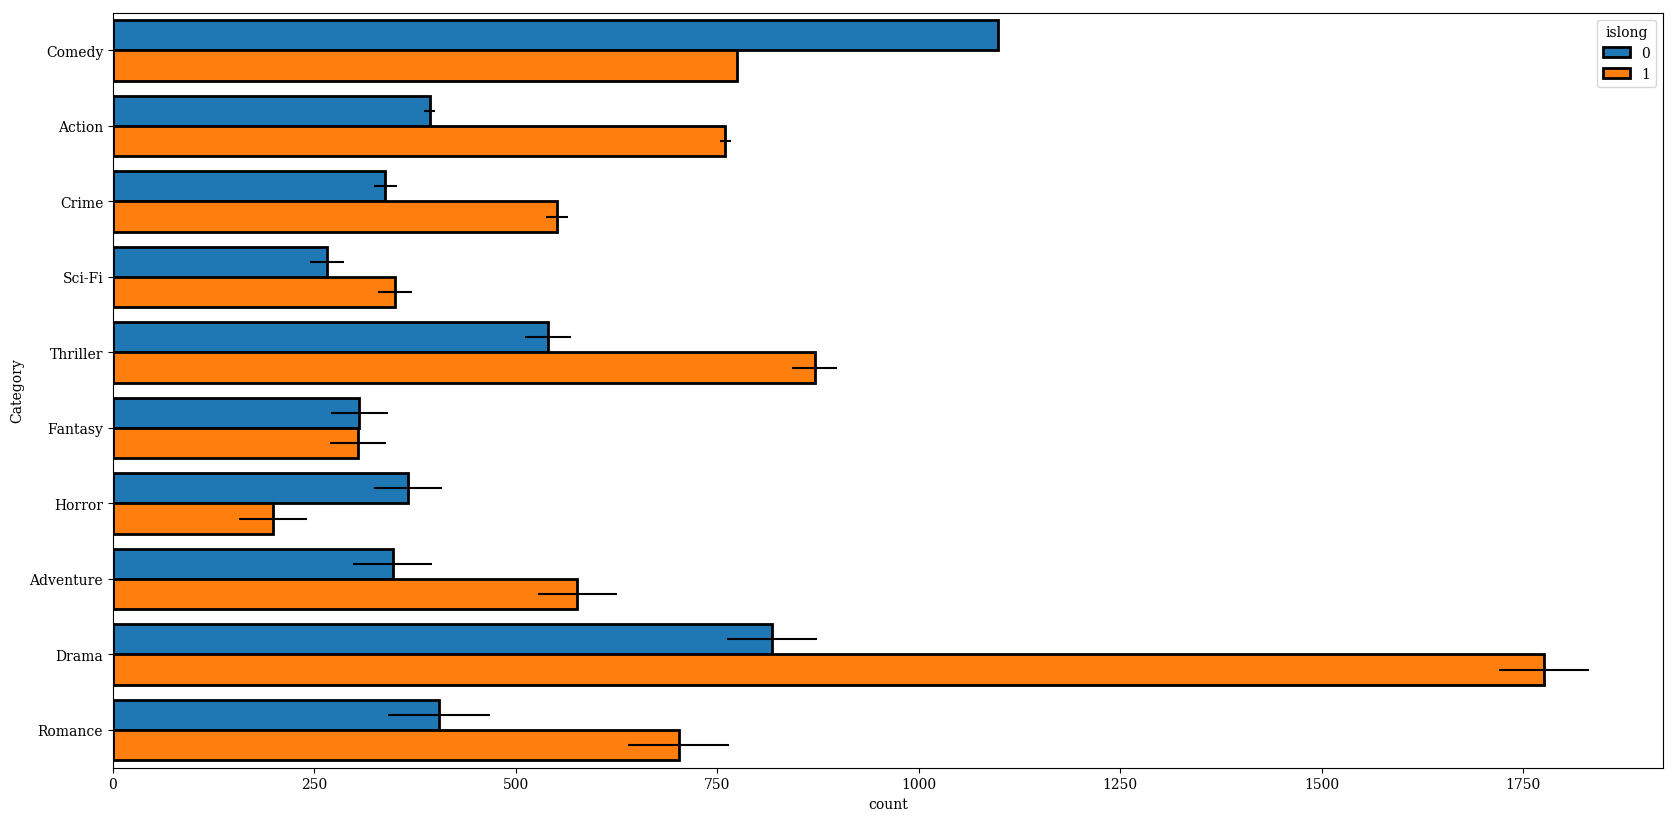

In [15]:
import numpy as np
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=7*np.arange(num_categories),
                  edgecolor=(0,0,0),
                  linewidth=2)

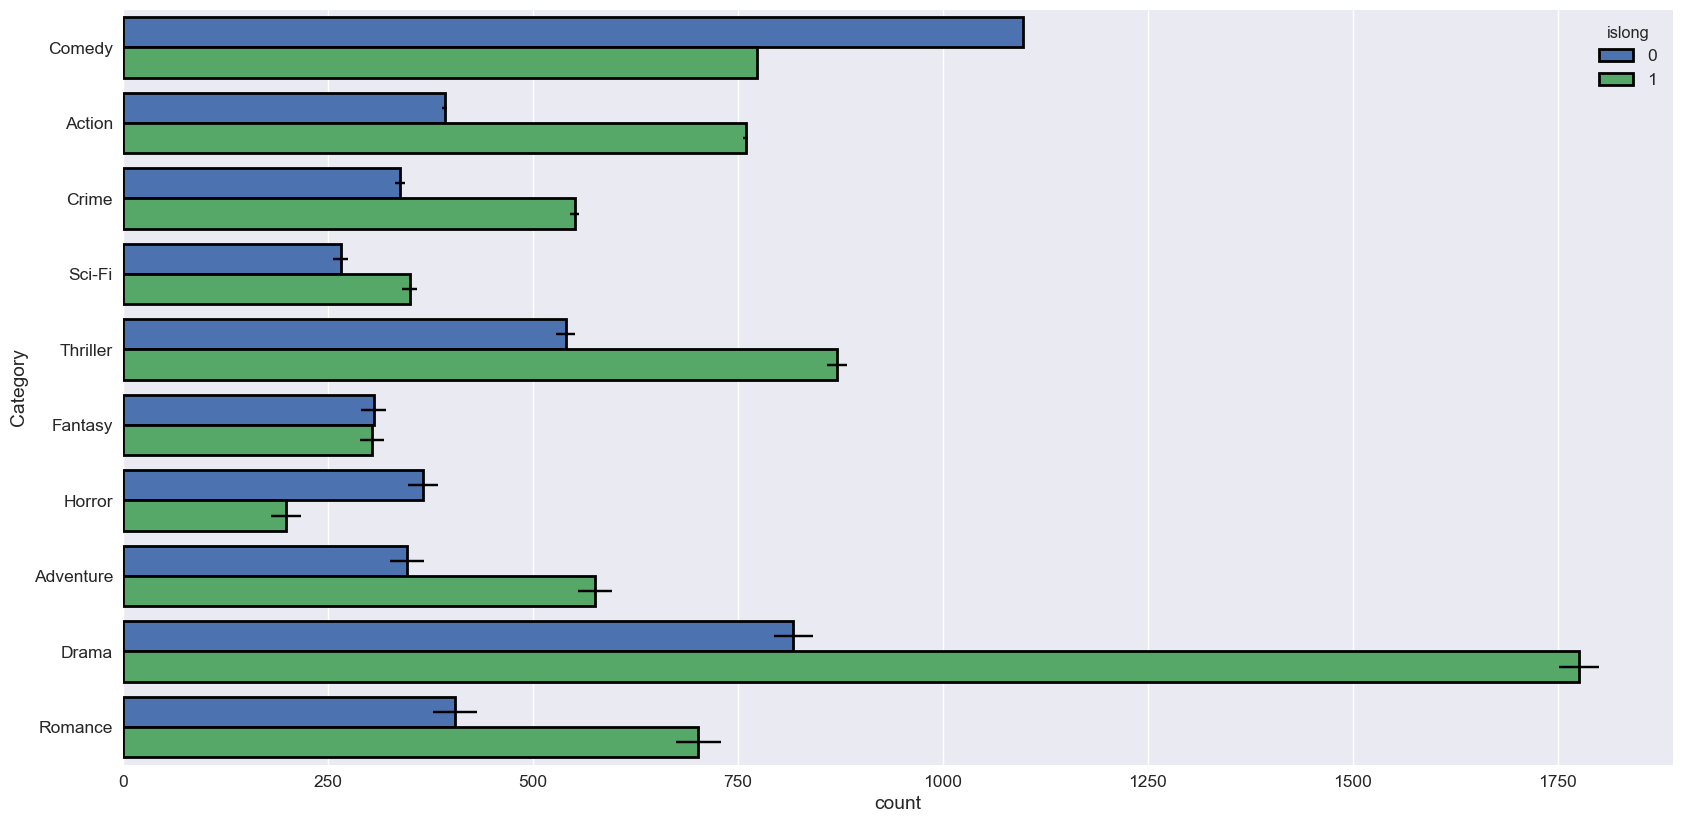

In [16]:
sns.set(font_scale=1.25)
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=3*np.arange(num_categories),
                  edgecolor=(0,0,0),
                  linewidth=2)

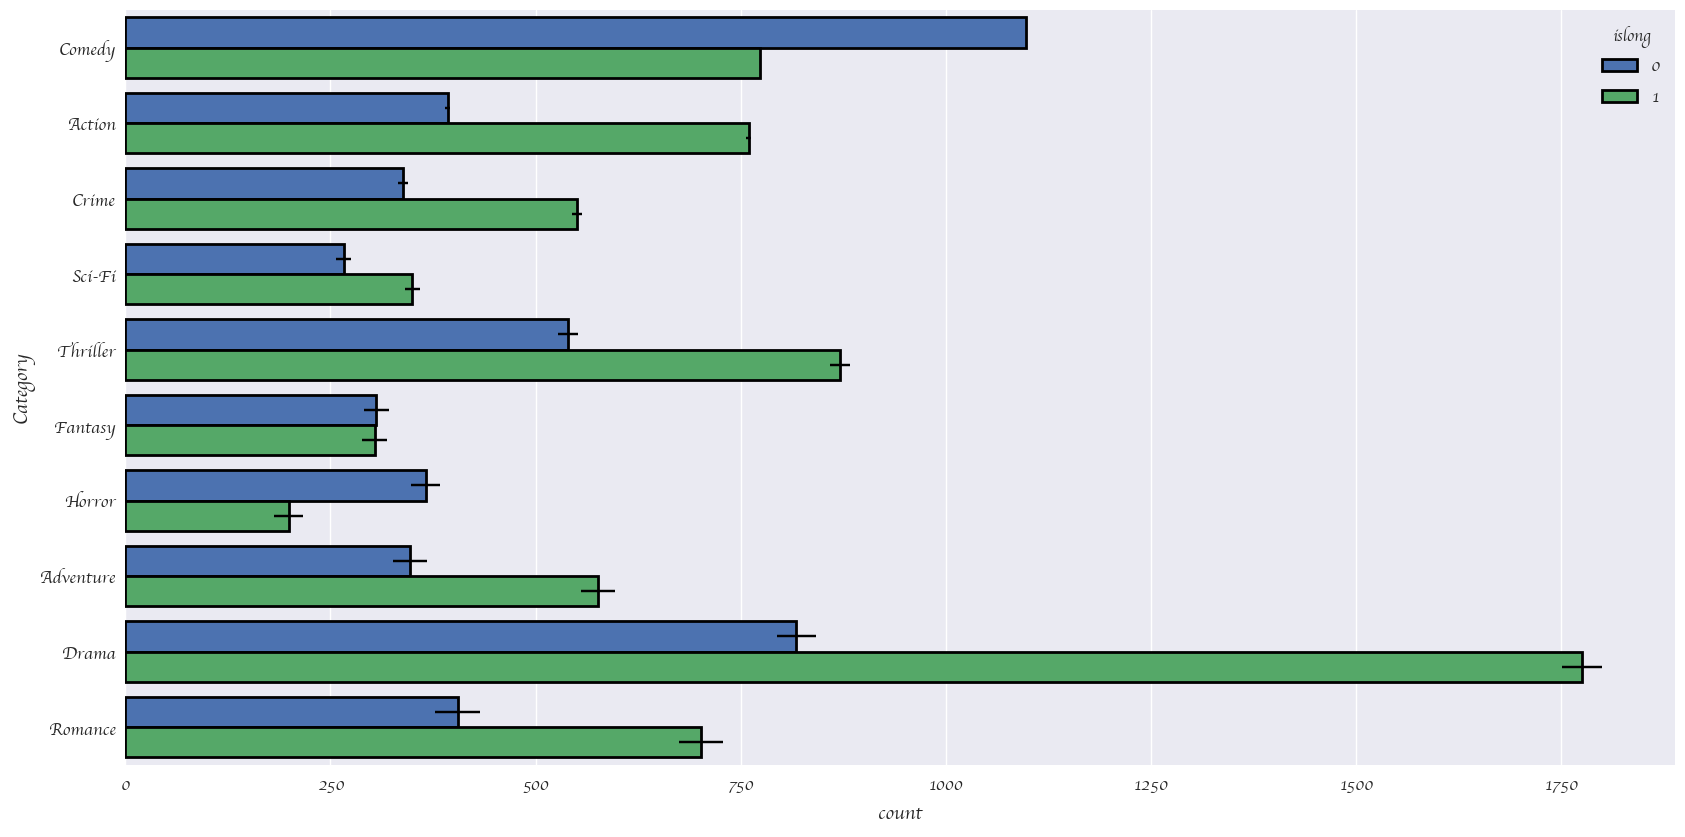

In [17]:
plt.rcParams['font.family'] = "cursive"
#sns.set(style="white",font_scale=1.25)
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=3*np.arange(num_categories),
                  edgecolor=(0,0,0),
                  linewidth=2)

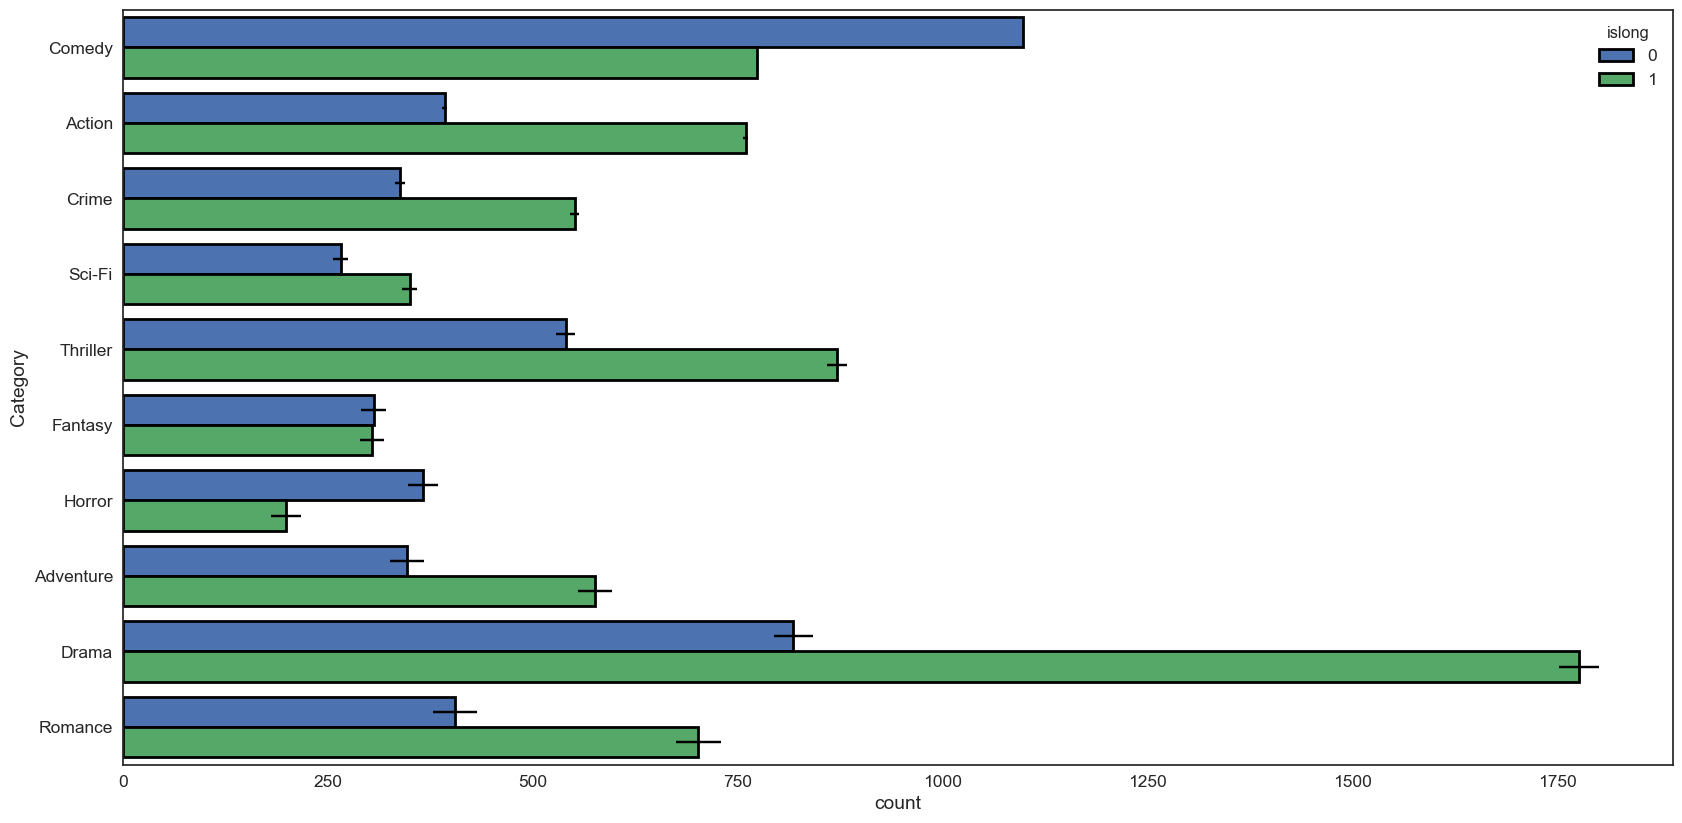

In [18]:
plt.rcParams['font.family'] = 'Times New Roman'
#sns.set_style({'font.family': 'Helvetica'})
sns.set(style="white",font_scale=1.25)
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=3*np.arange(num_categories),
                  edgecolor=(0,0,0),
                  linewidth=2)

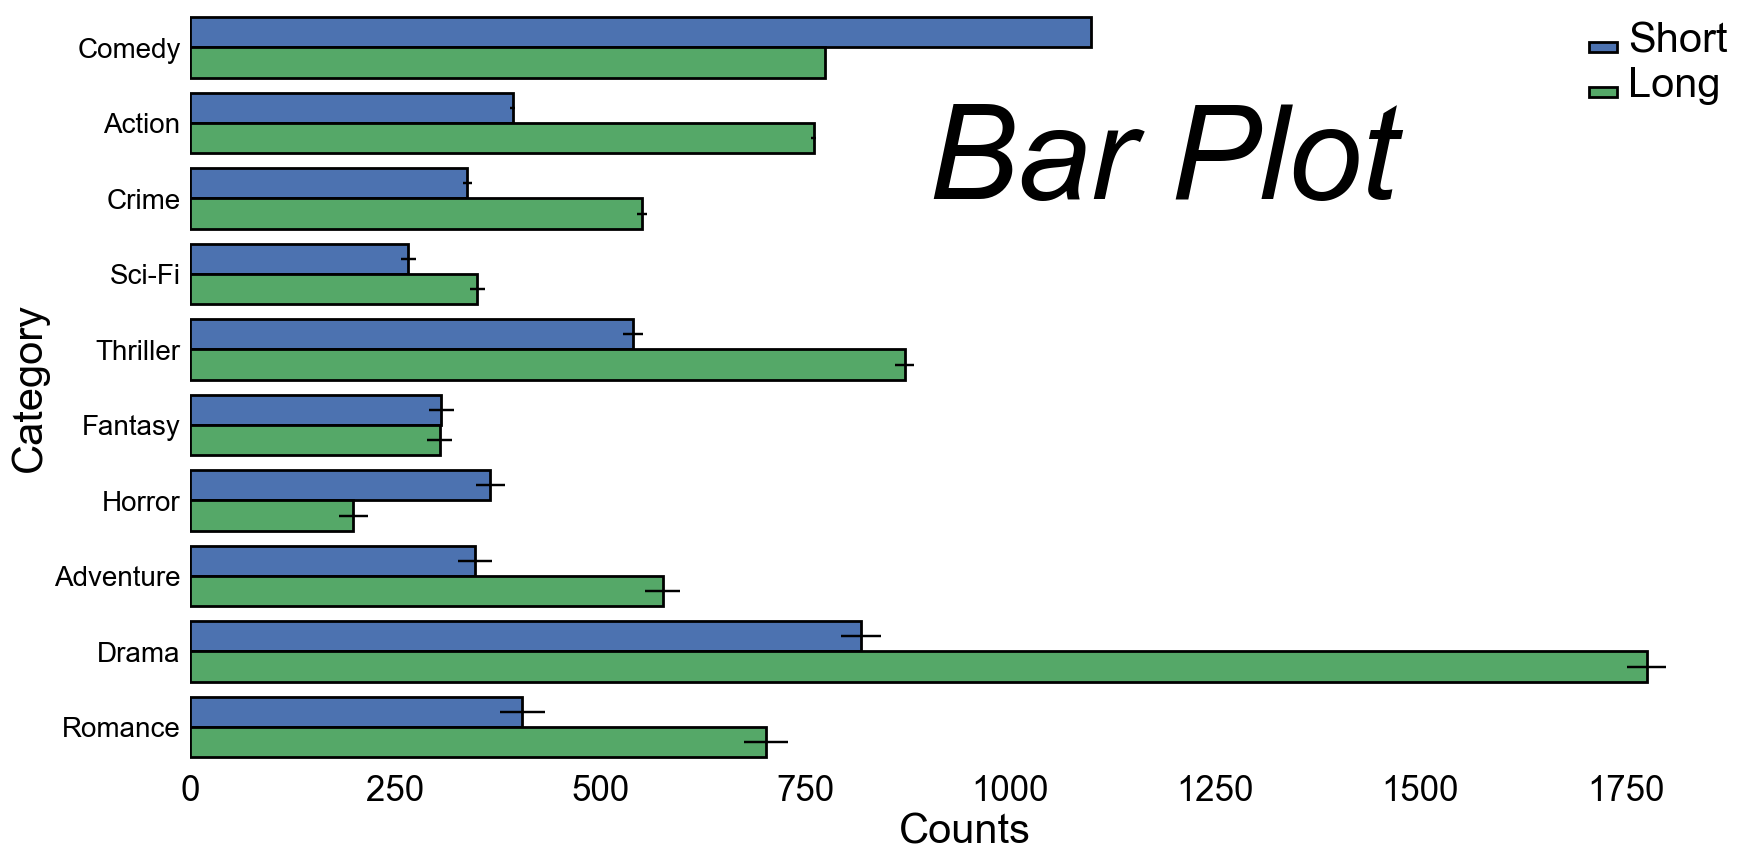

In [19]:
bg_color = 'white'
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'font.size':20,
            'ytick.labelsize':20})



#sns.set_style({'font.family': 'Helvetica'})
#sns.set(style="white",font_scale=1.25)
num_categories = df.Category.unique().size
p = sns.countplot(data=df,
                  y = 'Category',
                  hue = 'islong',
                  saturation=1,
                  xerr=3*np.arange(num_categories),
                  edgecolor=(0,0,0),
                  linewidth=2)
leg = p.get_legend()
leg.set_title("")
labs = leg.texts
labs[0].set_text("Short")
labs[0].set_fontsize(25)
labs[0].set_size(30)
labs[1].set_text("Long")
leg.get_title().set_color('black')
p.axes.xaxis.label.set_text("Counts")
plt.text(900,2, "Bar Plot", fontsize = 95, color='Black', fontstyle='italic')

In [20]:
p.get_figure().savefig('../../figures/barplot.png')